**Importando Bibliotecas**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time

**Pre-processamento dos dados**

In [2]:
#carregando dados de treino e de test
train_images = pd.read_csv('../fashion-mnist_train.csv')
test_images = pd.read_csv('../fashion-mnist_test.csv')

**Separando as labels do conjuntos:**

In [3]:
#separando as labels das imagens
train_labels=train_images.loc[:, ['label']]
train_images=train_images.drop(['label'], axis=1)
test_labels=test_images.loc[:, ['label']]
test_images=test_images.drop(['label'], axis=1)

**Normalizando os data-sets:**

In [4]:
#normalizacao
train_images = train_images / 255.0
test_images = test_images / 255.0


----------------------
## Construção do modelo base
**Esta rede será utilizada posteriomente para comparações entre os modelos de dimensionalidade reduzida utilizando PCA e autoencoder.**

**Importação de Bibliotecas**

In [5]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.models import Model
from keras.utils import plot_model

Using TensorFlow backend.


**Definição da estrutura do modelo por meio do Keras Sequential:**

In [6]:
#construcao da estrutura da rede neural
model = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(784)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 62,688
Trainable params: 62,688
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [7]:
#compilacao do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treino do modelo:**

In [8]:
start_time = time.time()
#treino do modelo
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, shuffle=True)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 172us/sample - loss: 0.5427 - accuracy: 0.8094 - val_loss: 0.4286 - val_accuracy: 0.8467
Epoch 2/10
48000/48000 [==============================] - 6s 117us/sample - loss: 0.3869 - accuracy: 0.8581 - val_loss: 0.3827 - val_accuracy: 0.8633
Epoch 3/10
48000/48000 [==============================] - 5s 110us/sample - loss: 0.3507 - accuracy: 0.8704 - val_loss: 0.3531 - val_accuracy: 0.8749
Epoch 4/10
48000/48000 [==============================] - 5s 110us/sample - loss: 0.3287 - accuracy: 0.8779 - val_loss: 0.3527 - val_accuracy: 0.8746
Epoch 5/10
48000/48000 [==============================] - 5s 109us/sample - loss: 0.3091 - accuracy: 0.8856 - val_loss: 0.3472 - val_accuracy: 0.8756
Epoch 6/10
48000/48000 [==============================] - 5s 109us/sample - loss: 0.2957 - accuracy: 0.8891 - val_loss: 0.3374 - val_accuracy: 0.8772
Epoch 7/10
48000/48000 [==========================

In [9]:
#tempo de treino por época
(end_time-start_time)/10

5.685864973068237

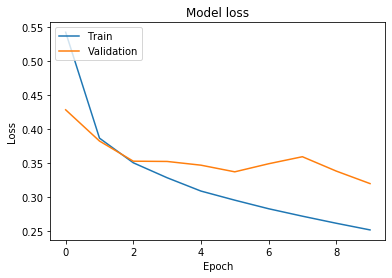

In [10]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Verificação dos resultados do modelo**

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Modelo Baseline - test loss:", test_loss * 100)
print("Modelo Baseline - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.2992 - accuracy: 0.8940
Modelo Baseline - test loss: 29.924631103277203
Modelo Baseline - test accuracy: 89.3999993801117


-----------------------------
## Redução de Dimensionalidade Usando Principal component analysis (PCA)

**Importação de Bibliotecas**

In [12]:
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

**Pré-processamento de dados (Feature Scaling)**

In [13]:
scaler = StandardScaler()

#fit aplicado para apenas o conjunto de treino
scaler.fit(train_images)

#aplicacao da transformacao para ambos os conjuntos de treino e de test
train_images_r = scaler.transform(train_images)
test_images_r = scaler.transform(test_images)


**Definição do número de componentes:**

In [14]:
#definicao do numero de componentes
pca = PCA(n_components=3)

**Construção dos novos datasets de treino e de teste com dimensões reduzidas usando o PCA:**

In [15]:
pca.fit(train_images_r)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
#transformacao das imagens originais de teste e treino reduzindo a dimensionalidade
train_images_r = pca.transform(train_images_r)
test_images_r = pca.transform(test_images_r)

**Preprocessamento: normalização e alteração do tipo dos dados de numpy array para pandas dataframe:**

In [17]:
#esse conjunto rr sera utilizado pela rede neural
train_images_rr = normalize(train_images_r)
test_images_rr = normalize(test_images_r)
train_images_rr = pd.DataFrame(data=train_images_rr)
test_images_rr = pd.DataFrame(data=test_images_rr)

#esse conjunto r sera utilizado posteriormente para a clusterizacao 
train_images_r = pd.DataFrame(data=train_images_r)
test_images_r= pd.DataFrame(data=test_images_r)

**Modelo Baseline que receberá os dados com dimensões reduzidas pelo PCA:**

In [18]:
#construcao da estrutura da rede neural
model_r = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
Total params: 12,704
Trainable params: 12,704
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [19]:
#compilacao do modelo
model_r.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Treino do modelo:**

In [20]:
start_time = time.time()
#treino do modelo
history_r = model_r.fit(train_images_rr, train_labels, epochs=10, validation_split=0.2, shuffle=True)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 63us/sample - loss: 1.1373 - accuracy: 0.5698 - val_loss: 1.0332 - val_accuracy: 0.5911
Epoch 2/10
48000/48000 [==============================] - 3s 58us/sample - loss: 1.0205 - accuracy: 0.5955 - val_loss: 1.0255 - val_accuracy: 0.5934
Epoch 3/10
48000/48000 [==============================] - 3s 58us/sample - loss: 1.0122 - accuracy: 0.5954 - val_loss: 1.0176 - val_accuracy: 0.5933
Epoch 4/10
48000/48000 [==============================] - 3s 59us/sample - loss: 1.0061 - accuracy: 0.6005 - val_loss: 1.0214 - val_accuracy: 0.5950
Epoch 5/10
48000/48000 [==============================] - 3s 60us/sample - loss: 1.0014 - accuracy: 0.6028 - val_loss: 1.0229 - val_accuracy: 0.5911
Epoch 6/10
48000/48000 [==============================] - 3s 59us/sample - loss: 0.9996 - accuracy: 0.6025 - val_loss: 1.0081 - val_accuracy: 0.6011
Epoch 7/10
48000/48000 [==============================] 

In [21]:
#tempo de treino por época
(end_time-start_time)/10

2.8761523008346557

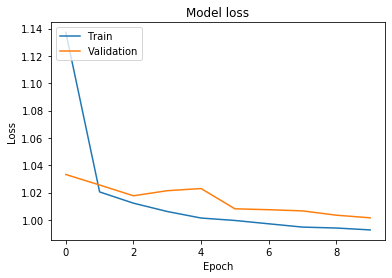

In [22]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Verificação dos resultados do modelo:**

In [23]:
test_loss, test_acc = model_r.evaluate(test_images_rr, test_labels)
print("Modelo usando features do PCA - test loss:", test_loss * 100)
print("Modelo usando features do PCA - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.9926 - accuracy: 0.6084
Modelo usando features do PCA - test loss: 99.26139829635619
Modelo usando features do PCA - test accuracy: 60.839998722076416


------------------------------------------------------

## Redução de Dimensionalidade Usando Autoencoders

**Instanciação da rede do autoencoder:**

In [24]:
#dimensao do output do processo de encoding, ou seja, dimensao apos compressao
encoding_dim = 2
#declaracao da imagen de input
input_img = Input(shape=(784,))
#representacao do input apos encoding
encoded = Dense(encoding_dim, activation='relu')(input_img)
#representacao da reconstrucao do input
decoded = Dense(784, activation='sigmoid')(encoded)

• Modelo do autoencoding

In [25]:
# modelo do input para sua a sua reconstrucao apos decoding
autoencoder = Model(input_img, decoded)

• Modelo do encoding

In [26]:
#modelo que mapeia o input relativo a sua reconstrucao apos encoding
encoder = Model(input_img, encoded)

In [27]:
#declaracao da o input comprimido
encoded_input = Input(shape=(encoding_dim,))
# recupera a ultima camada do modelo do autoencoder
decoder_layer = autoencoder.layers[-1]

• Modelo do decoding

In [28]:
decoder = Model(encoded_input, decoder_layer(encoded_input))

**Compilação do Modelo do Autoencoder:**

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Treino do Autoencoder:**

In [30]:
history_auto = autoencoder.fit(train_images, train_images,epochs=10,shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.4411 - val_loss: 0.4120
Epoch 2/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.4045 - val_loss: 0.3990
Epoch 3/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.3942 - val_loss: 0.3910
Epoch 4/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.3872 - val_loss: 0.3848
Epoch 5/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.3818 - val_loss: 0.3805
Epoch 6/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.3787 - val_loss: 0.3784
Epoch 7/10
48000/48000 [==============================] - 9s 194us/step - loss: 0.3774 - val_loss: 0.3776
Epoch 8/10
48000/48000 [==============================] - 6s 125us/step - loss: 0.3767 - val_loss: 0.3771
Epoch 9/10
48000/48000 [==============================] - 6s 135us/step - loss: 0.3764 - val_loss: 0.3

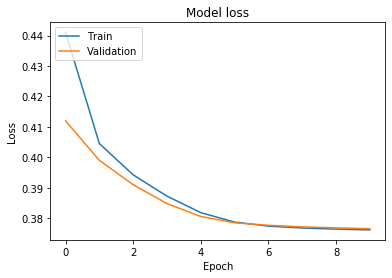

In [31]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history_auto.history['loss'])
plt.plot(history_auto.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Utilização do encoding para a compressão das imagens do conjunto de treino e de test, e normalização para utilização posterior na rede neural.**

In [32]:
#compressao das imagens pelo encoding e normalizacao para treino na rede neural
encoded_train_images = encoder.predict(train_images)
encoded_test_images = encoder.predict(test_images)
encoded_train_images = normalize(encoded_train_images)
encoded_test_images = normalize(encoded_test_images)

In [33]:
#transformacao de numpy array para pandas data frame
train_images_a = pd.DataFrame(data=encoded_train_images)
test_images_a =pd.DataFrame(data=encoded_test_images)

**Modelo Baseline que receberá os dados com dimensões reduzidas pelo PCA:**

In [34]:
#construcao da estrutura da rede neural
model_a = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(2)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model_a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
Total params: 12,640
Trainable params: 12,640
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [35]:
#compilacao do modelo
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Treino do modelo:**

In [36]:
start_time = time.time()
#treino do modelo
history_a = model_a.fit(train_images_a, train_labels, epochs=10, validation_split=0.2, shuffle=True)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 64us/sample - loss: 1.7528 - accuracy: 0.3268 - val_loss: 1.6396 - val_accuracy: 0.3599
Epoch 2/10
48000/48000 [==============================] - 3s 70us/sample - loss: 1.6252 - accuracy: 0.3768 - val_loss: 1.6195 - val_accuracy: 0.3760
Epoch 3/10
48000/48000 [==============================] - 3s 61us/sample - loss: 1.6093 - accuracy: 0.3860 - val_loss: 1.6038 - val_accuracy: 0.3857
Epoch 4/10
48000/48000 [==============================] - 3s 60us/sample - loss: 1.6020 - accuracy: 0.3883 - val_loss: 1.5987 - val_accuracy: 0.3857
Epoch 5/10
48000/48000 [==============================] - 3s 59us/sample - loss: 1.5976 - accuracy: 0.3899 - val_loss: 1.5934 - val_accuracy: 0.3861
Epoch 6/10
48000/48000 [==============================] - 3s 59us/sample - loss: 1.5951 - accuracy: 0.3918 - val_loss: 1.5944 - val_accuracy: 0.3912
Epoch 7/10
48000/48000 [==============================] 

In [37]:
#tempo de treino por época
((end_time-start_time)/10)

2.958415699005127

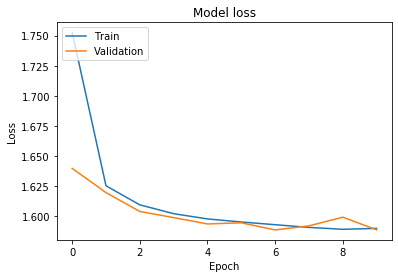

In [38]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
test_loss, test_acc = model_a.evaluate(test_images_a, test_labels)
print("Modelo usando features reduzidas pelo autoencoder - test loss:", test_loss * 100)
print("Modelo usando features reduzidas pelo autoencoder - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 36us/sample - loss: 1.5784 - accuracy: 0.3934
Modelo usando features reduzidas pelo autoencoder - test loss: 157.8396117401123
Modelo usando features reduzidas pelo autoencoder - test accuracy: 39.340001344680786


-----------------------
## Clusteting com o K-means

**Importando bibliotecas**

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**Optamos pela utilização das imagens reduzidas por meio do PCA, já que obtiveram por meio deste modelo os melhores resultados de predição na rede neural.**

In [41]:
train_images_k = train_images_r
test_images_k = test_images_r

**Construção do modelo e execução do k-means com 10 clusters.**

In [42]:
#instanciacao do modelo com 10 clusters
kmean_model = KMeans(n_clusters=10, random_state=10)
#execucao do kmeans
kmean_model.fit(train_images_k)
#retorno dos labels dos clusteres gerados por meio do kmeans
labels = kmean_model.labels_

In [43]:
#retorno das centroids geradas pelo kmeans
cluster_centroids = kmean_model.cluster_centers_

**Coeficiente de Silhouette**

In [ ]:
silhouette_score(X = train_images_k, labels = labels, random_state = 10)

**V-measure Score**

In [ ]:
metrics.v_measure_score(train_labels.values.ravel(), labels, beta=1.0)

**Gráfico plotado utilizando os pontos com coordenadas geradas por meio do PLC com as classificações (i.e. labels) reais**

In [ ]:
# Plotting train_images with classification
fig = plt.figure()
ax = fig.gca(projection='3d')

unique_labels = set(train_labels.values.flatten())
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

train_images_np = train_images_r.values

last_k = -1
for k, col in zip(unique_labels, colors):
    
    class_member_mask = (train_labels == k)
    indices = np.where(class_member_mask == True)
    for index in indices:
        ax.plot(train_images_np[index, 0], train_images_np[index, 1], train_images_np[index, 2],'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6, label=f"classe: {k}" if k == last_k else "")
        last_k = k
    
ax.legend()
plt.show()

**Gráfico plotado os pontos com coordenadas geradas por meio do PLC com seus clusters e respectivas centróides gerados por meio do K-means.**

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    
    class_member_mask = (labels == k)
    indices = np.where(class_member_mask == True)
    for index in indices:
        ax.plot(train_images_np[index, 0], train_images_np[index, 1], train_images_np[index, 2],'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6, label=f"cluster: {k}")

#Plotting cluster centroids
ax.plot(cluster_centroids[:, 0], cluster_centroids[:, 1], cluster_centroids[:, 2],'*', markerfacecolor=tuple([1, 1, 1, 1]),
            markersize=14, label="centroids")

ax.legend()
plt.show()

---------------------------------
## Clustering com o DBScan


**Importação de Bibliotecas**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

**Optamos pela utilização das imagens reduzidas por meio do PCA, já que obtiveram por meio deste modelo os melhores resultados de predição na rede neural.**

In [ ]:
#features geradas por meio do PCA
train_images_dbscan = train_images_r
test_images_dbscan = test_images_r

**Cálculo do melhor valor para o parâmetro épsilon.**

In [ ]:
#Calculando melhor valor para o parametro épsilon
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(train_images_dbscan)
distances, indices = nbrs.kneighbors(train_images_dbscan)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


**Execução do DBSCan**

In [ ]:
# Executando o algoritmo DBSCAN
print(train_images_dbscan)
db = DBSCAN(eps=0.38, min_samples=27).fit(train_images_dbscan)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true = train_labels.values.flatten()

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(train_images_dbscan, labels))

**Gráfico plotado os pontos com coordenadas geradas por meio do PLC com seus clusters produzidos por meio do DBScan.**

In [ ]:
# Plotando o resultado
fig = plt.figure()
ax = fig.gca(projection='3d')

# Preto removido e utilizado para noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

train_images_dbscan_np = train_images_dbscan.values

last_k = -1
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Preto utilizado para noise.
        col = [0, 0, 0, 1]
    else:

        class_member_mask = (labels == k)

        xy = train_images_dbscan_np[class_member_mask & core_samples_mask]
    #     ax.plot(xy[:3, 0], xy[:3, 1], xy[:3, 2], c=tuple(col))

        ax.plot(xy[:, 0], xy[:, 1], xy[:, 2],'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label=f"cluster: {k}" if k == last_k else "")
        
        last_k = k
        
        xy = train_images_dbscan_np[class_member_mask & ~core_samples_mask]
    #     ax.plot(xy[:3, 0], xy[:3, 1], xy[:3, 2], c=tuple(col))
        ax.plot(xy[:, 0], xy[:, 1], xy[:, 2],'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6, label=f"cluster: {k}" if k == last_k else "")
    
        
ax.legend()
plt.show()